# Task 1
Setup and Basic Extraction

In [ ]:
pip install ffmpeg-python

In [5]:
import ffmpeg
input_video_path = "C:/Users/91924/Desktop/vijay/iav/lab2/854136-hd_1920_1080_25fps.mp4"

try:
    probe = ffmpeg.probe(input_video_path)

    # Extract video stream information
    video_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'video'), None)

    if video_stream:
        width = video_stream['width']
        height = video_stream['height']
        frame_rate = eval(video_stream['r_frame_rate'])
        duration = float(video_stream['duration'])
        num_frames = int(video_stream['nb_frames'])

        print(f"Width: {width}")
        print(f"Height: {height}")
        print(f"FPS: {frame_rate} ")
        print(f"Number of Frames: {num_frames}")
    else:
        print("No video stream found in the file.")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure ffmpeg is installed and added to the system PATH.")


Width: 1920
Height: 1080
FPS: 25.0 
Number of Frames: 437


# Task 2
Frame Type Analysis

Frame percentages: {'I': 1.3729977116704806, 'P': 98.62700228832952, 'B': 0.0}


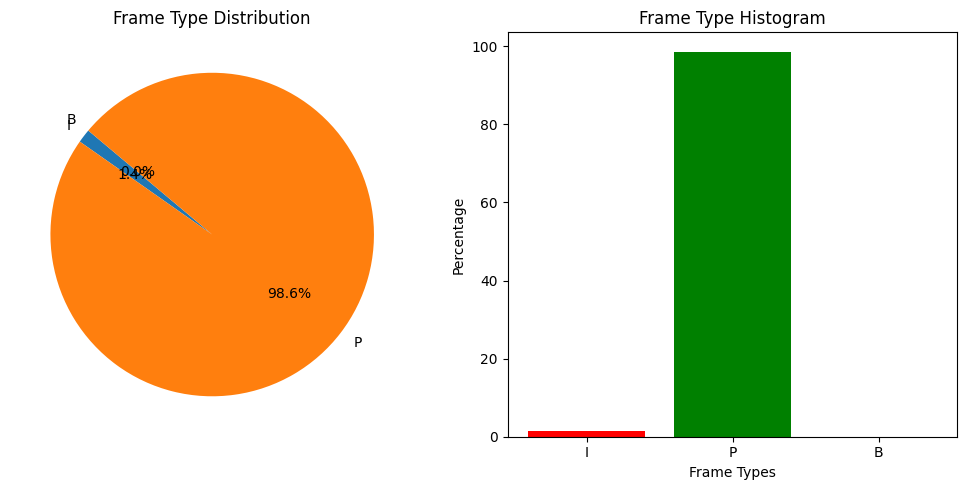

In [1]:
import subprocess
import matplotlib.pyplot as plt


def extract_frame_types(video_path):
    command = [
        'ffmpeg',
        '-i', video_path,
        '-vf', 'showinfo',
        '-f', 'null',
        '-'
    ]
    result = subprocess.run(command, stderr=subprocess.PIPE, text=True)
    output = result.stderr

    frame_types = {'I': 0, 'P': 0, 'B': 0}
    for line in output.split('\n'):
        if 'type:' in line:
            if 'I' in line:
                frame_types['I'] += 1
            elif 'P' in line:
                frame_types['P'] += 1
            elif 'B' in line:
                frame_types['B'] += 1
    
    return frame_types

video_path = "C:/Users/91924/Desktop/vijay/iav/lab2/854136-hd_1920_1080_25fps.mp4"
frame_types = extract_frame_types(video_path)
total_frames = sum(frame_types.values())
if total_frames == 0:
    print('No frames were detected.')
else:
    frame_percentages = {k: (v / total_frames) * 100 for k, v in frame_types.items()}

    
    print('Frame percentages:', frame_percentages)

    
    labels = list(frame_percentages.keys())
    sizes = list(frame_percentages.values())
    plt.figure(figsize=(10, 5))

    
    plt.subplot(1, 2, 1)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Frame Type Distribution')

    
    plt.subplot(1, 2, 2)
    plt.bar(labels, sizes, color=['red', 'green', 'blue'])
    plt.xlabel('Frame Types')
    plt.ylabel('Percentage')
    plt.title('Frame Type Histogram')

    plt.tight_layout()
    plt.show()


# Task 3
Visualizing Frames

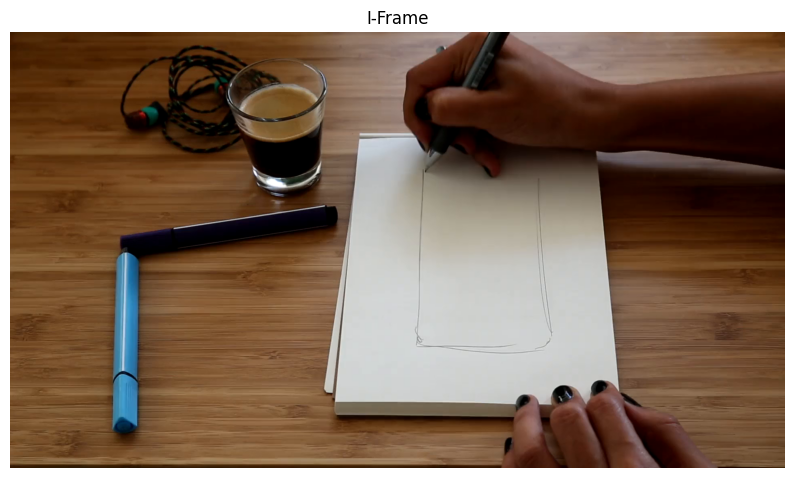

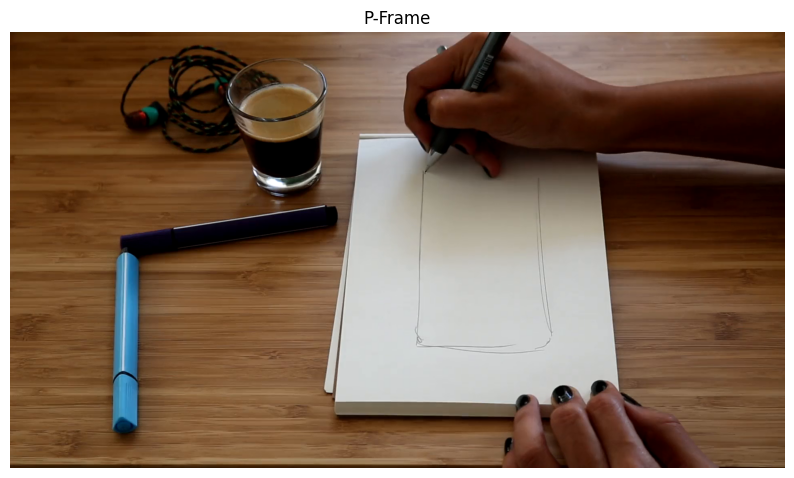

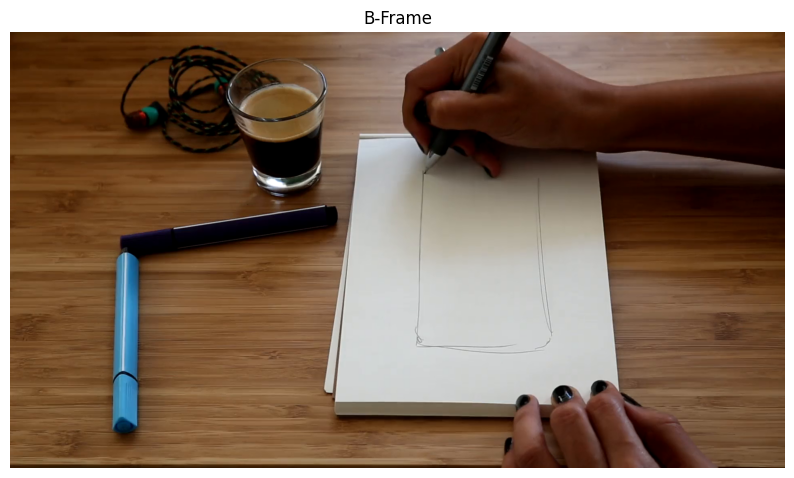

In [2]:
import cv2
import matplotlib.pyplot as plt


i_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/I_frames/I_frames_001.png"
i_frame = cv2.imread(i_frame_path)
if i_frame is not None:
    i_frame_rgb = cv2.cvtColor(i_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(i_frame_rgb)
    plt.title('I-Frame')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: File not found at {i_frame_path}")


p_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/p_frames/p_frames_001.png"
p_frame = cv2.imread(p_frame_path)
if p_frame is not None:
    p_frame_rgb = cv2.cvtColor(p_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(p_frame_rgb)
    plt.title('P-Frame')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: File not found at {p_frame_path}")


b_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/BFRAMES/b_frames_001.png"
b_frame = cv2.imread(b_frame_path)
if b_frame is not None:
    b_frame_rgb = cv2.cvtColor(b_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(b_frame_rgb)
    plt.title('B-Frame')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: File not found at {b_frame_path}")


In [2]:
import os
from skimage import io
from skimage.metrics import structural_similarity as ssim

def get_file_size(file_path):
    """Returns the file size in bytes."""
    if os.path.exists(file_path):
        return os.path.getsize(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

def calculate_ssim(image_path1, image_path2, data_range):
    """Calculates the SSIM between two images."""
    image1 = io.imread(image_path1, as_gray=True)
    image2 = io.imread(image_path2, as_gray=True)
    ssim_index, _ = ssim(image1, image2, data_range=data_range, full=True)
    return ssim_index

# Paths
i_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/I_frames/I_frames_001.png"
p_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/p_frames/p_frames_001.png"
b_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/BFRAMES/b_frames_001.png"

# Getting sizes
i_frame_size = get_file_size(i_frame_path)
p_frame_size = get_file_size(p_frame_path)
b_frame_size = get_file_size(b_frame_path)

print(f"I-frame size: {i_frame_size / 1024:.2f} KB")
print(f"P-frame size: {p_frame_size / 1024:.2f} KB")
print(f"B-frame size: {b_frame_size / 1024:.2f} KB")


data_range = 255

# Calculating SSIM
ssim_p_vs_i = calculate_ssim(i_frame_path, p_frame_path, data_range)
ssim_b_vs_i = calculate_ssim(i_frame_path, b_frame_path, data_range)
ssim_b_vs_p = calculate_ssim(p_frame_path, b_frame_path, data_range)

print(f"SSIM between I-frame and P-frame: {ssim_p_vs_i:.4f}")
print(f"SSIM between I-frame and B-frame: {ssim_b_vs_i:.4f}")
print(f"SSIM between P-frame and B-frame: {ssim_b_vs_p:.4f}")




I-frame size: 3.84 KB
P-frame size: 5.56 KB
B-frame size: 25.58 KB
SSIM between I-frame and P-frame: 0.9359
SSIM between I-frame and B-frame: 0.8760
SSIM between P-frame and B-frame: 0.8939


# Task 4
Visualizing Frames

In [3]:
import os

def get_file_size(file_path):
    """Returns the file size in bytes."""
    if os.path.exists(file_path):
        return os.path.getsize(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Paths 
i_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/I_frames/I_frames_001.png"
p_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/p_frames/p_frames_001.png"
b_frame_path = "C:/Users/91924/Desktop/vijay/iav/lab2/BFRAMES/b_frames_001.png"

# Geting sizes
i_frame_size = get_file_size(i_frame_path)
p_frame_size = get_file_size(p_frame_path)
b_frame_size = get_file_size(b_frame_path)


print(f"I-frame size: {i_frame_size / 1024:.2f} KB")
print(f"P-frame size: {p_frame_size / 1024:.2f} KB")
print(f"B-frame size: {b_frame_size / 1024:.2f} KB")



I-frame size: 1275.86 KB
P-frame size: 1419.21 KB
B-frame size: 1393.74 KB


In [9]:
import os


def get_file_size(filepath):
    return os.path.getsize(filepath)

# Function to list all files in a directory
def list_files_in_directory(directory_path):
    return [os.path.join(directory_path, filename) for filename in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, filename))]

# Function to calculate average size
def calculate_average_size(frame_paths):
    total_size = sum(get_file_size(path) for path in frame_paths)
    return total_size / len(frame_paths) if frame_paths else 0

# Paths to your frame directories
i_frame_dir = 'C:/Users/91924/Desktop/vijay/iav/lab2/I_frames'
p_frame_dir = "C:/Users/91924/Desktop/vijay/iav/lab2/p_frames"
b_frame_dir = "C:/Users/91924/Desktop/vijay/iav/lab2/BFRAMES"

# List files in each directory
i_frame_paths = list_files_in_directory(i_frame_dir)
p_frame_paths = list_files_in_directory(p_frame_dir)
b_frame_paths = list_files_in_directory(b_frame_dir)

# Calculate average sizes
avg_i_frame_size = calculate_average_size(i_frame_paths)
avg_p_frame_size = calculate_average_size(p_frame_paths)
avg_b_frame_size = calculate_average_size(b_frame_paths)

# Print average sizes
print(f"Average I Frame Size: {avg_i_frame_size} bytes")
print(f"Average P Frame Size: {avg_p_frame_size} bytes")
print(f"Average B Frame Size: {avg_b_frame_size} bytes")


Average I Frame Size: 1554395.5 bytes
Average P Frame Size: 1898694.1315789474 bytes
Average B Frame Size: 1900240.217665615 bytes


# Task 5
Advanced Frame Extraction

In [19]:
import cv2
import os
frames_path = 'C:/Users/91924/Desktop/vijay/iav/lab2/I_frames'
output_video_path = 'C:/Users/91924/Desktop/output_video.mp4'


frame_rate = 1 

# Get list of files in the directory and sort them
frames = sorted([f for f in os.listdir(frames_path) if f.endswith('.png')])


first_frame = cv2.imread(os.path.join(frames_path, frames[0]))
height, width, _ = first_frame.shape

#  create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
video_writer = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

# Write each frame to the video
for frame_file in frames:
    frame_path = os.path.join(frames_path, frame_file)
    frame = cv2.imread(frame_path)
    video_writer.write(frame)

# Release the VideoWriter object
video_writer.release()
